In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/Users/anshulpattoo/Desktop/CISC 251/Project/Python scripts/Spreadsheets/unmodifiedwinners.csv', index_col=0)
df

,the_AT,and_CC,to_TO,of_IN,a_AT,in_IN,we_PPSS,i_PPSS,for_IN,is_BEZ,...,east_NR,walk_VB,morning_NN,decision_NN,led_VBD,september_NP,areas_NNS,outstanding_JJ,streets_NNS,winners
0,0.047838,0.037313,0.021814,0.020475,0.020283,0.020092,0.013586,0.004018,0.010716,0.005549,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000191,1.0
1,0.040797,0.031784,0.023482,0.016603,0.022770,0.022533,0.010199,0.011860,0.010199,0.008776,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000237,0.0,0.000000,1.0
2,0.037022,0.033041,0.016919,0.018113,0.019904,0.016322,0.013734,0.017914,0.007166,0.009355,...,0.000000,0.000000,0.000000,0.000199,0.000000,0.0,0.000000,0.0,0.000398,1.0
3,0.053289,0.037926,0.018243,0.024964,0.015362,0.027844,0.012962,0.002880,0.009122,0.007201,...,0.000480,0.000000,0.000000,0.000000,0.000000,0.0,0.000480,0.0,0.000000,1.0
4,0.051535,0.029605,0.012061,0.026316,0.025219,0.020833,0.002193,0.010965,0.006579,0.006579,...,0.002193,0.000000,0.000000,0.001097,0.000000,0.0,0.000000,0.0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,0.049268,0.039281,0.017643,0.029627,0.019308,0.015646,0.006658,0.009321,0.008988,0.007989,...,0.001332,0.000000,0.000333,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
427,0.042038,0.026396,0.022485,0.018140,0.016185,0.013578,0.010319,0.016511,0.010645,0.012057,...,0.000109,0.000000,0.000000,0.000109,0.000000,0.0,0.000000,0.0,0.000000,0.0
428,0.036674,0.026976,0.026530,0.017389,0.019842,0.016052,0.009809,0.019507,0.010367,0.010367,...,0.000223,0.000000,0.000000,0.000111,0.000111,0.0,0.000000,0.0,0.000000,0.0
429,0.041244,0.031104,0.028569,0.017843,0.017453,0.015601,0.021743,0.015991,0.005655,0.010140,...,0.001072,0.000293,0.000000,0.000098,0.000000,0.0,0.000000,0.0,0.000293,0.0


In [6]:
#Separating out the features
x = df.iloc[:, :1000]

#Separating out the target
y = df.iloc[:, 1000]

#Standardizing the features
x = StandardScaler().fit_transform(x)


In [7]:
from sklearn.decomposition import PCA

#I want a PCA: two principal components.
pca = PCA(n_components = 2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ["PC1", "PC2"])
principalDf

,PC1,PC2
0,3.035004,6.329117
1,-6.819458,-4.380561
2,1.198775,-2.691476
3,12.534833,1.246620
4,14.362575,-0.916967
...,...,...
426,6.897366,-3.405810
427,-5.755562,-2.566816
428,-4.594186,-3.379937
429,2.522306,-5.632309


In [8]:
from sklearn.mixture import GaussianMixture

EM = GaussianMixture(n_components = 2) 
EM.fit(principalDf)

clusters = EM.predict(principalDf)

clusters = EM.predict_proba(principalDf)

# print((clusters == 0).sum())
# print((clusters == 1).sum())

winnersDf = principalDf.assign(winners = df.iloc[:, 1000].values)

clusters = clusters.tolist()
for i in range(len(clusters)):
    clusters[i] = max(clusters[i])
clusters
clustersDf = principalDf.assign(clusters = clusters)
clustersDf

,PC1,PC2,clusters
0,3.035004,6.329117,1.000000
1,-6.819458,-4.380561,0.998572
2,1.198775,-2.691476,0.749945
3,12.534833,1.246620,0.999999
4,14.362575,-0.916967,0.999931
...,...,...,...
426,6.897366,-3.405810,0.955683
427,-5.755562,-2.566816,0.963351
428,-4.594186,-3.379937,0.974467
429,2.522306,-5.632309,0.785267


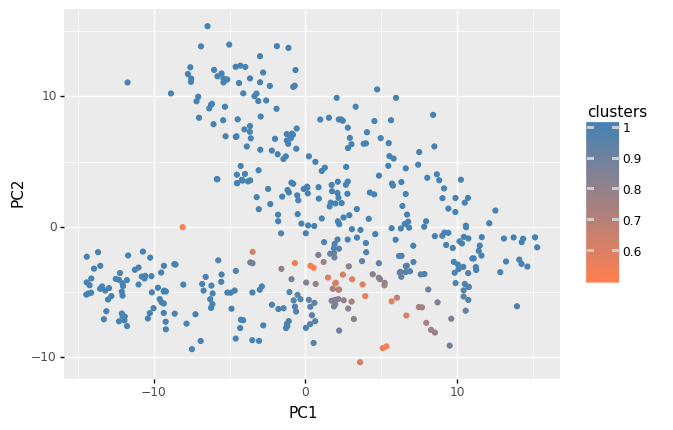

<ggplot: (305879360)>

In [9]:
from plotnine import *
ggplot(clustersDf, aes(x = "PC1", y = "PC2", color = "clusters")) + geom_point() + scale_colour_gradient(low="coral", high="steelblue")

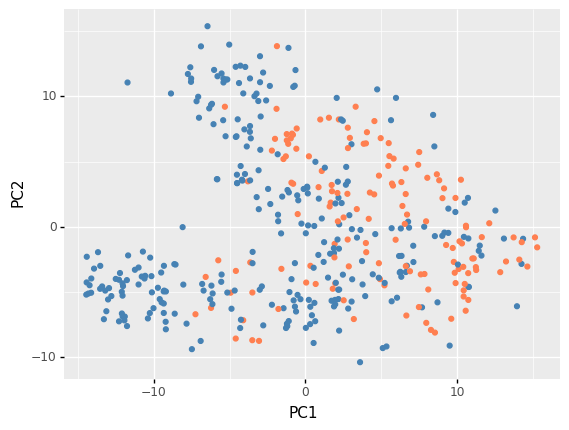

<ggplot: (306143608)>

In [10]:
(ggplot(winnersDf, aes(x = "PC1", y = "PC2", color = "winners")) 
+ geom_point() 
+ theme(legend_position="none")) + scale_colour_gradient(low="coral", high="steelblue")